/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


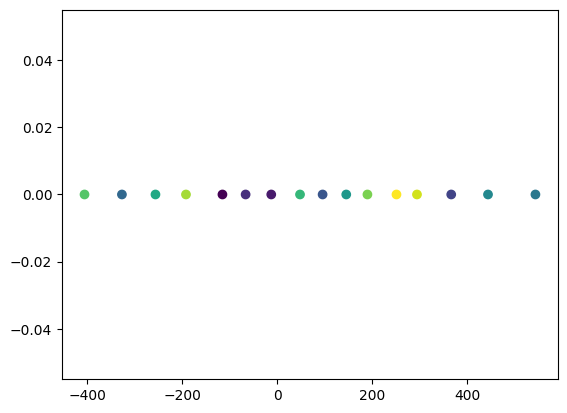

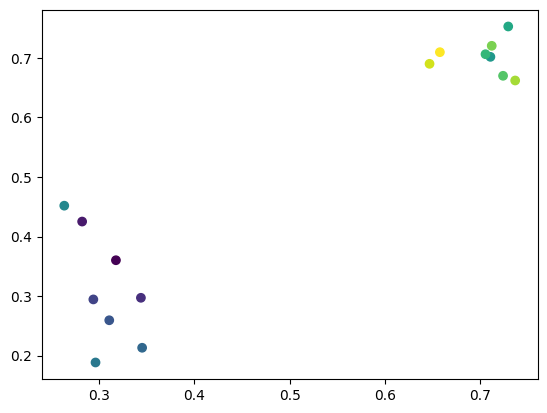

In [41]:
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

perplexity = 4
tsne = TSNE(n_components=1, random_state=0, perplexity=perplexity, n_iter=5000)

mean = [0.3, 0.3]
cov = [[0.005, 0], [0, 0.005]]
data_hd_1 = np.random.multivariate_normal(mean, cov, 8)

mean = [0.7, 0.7]
cov = [[0.001, 0], [0, 0.001]]
data_hd_2 = np.random.multivariate_normal(mean, cov, 8)

data_hd = np.concatenate((data_hd_1, data_hd_2))
data_ld = tsne.fit_transform(data_hd)

# Plot data_ld with the same coloring
plt.scatter(data_ld, np.zeros_like(data_ld), c=np.arange(len(data_ld)), cmap='viridis')
plt.show()

# Plot data_hd with different colors
plt.scatter(data_hd[:, 0], data_hd[:, 1], c=np.arange(len(data_hd)), cmap='viridis')
plt.show()




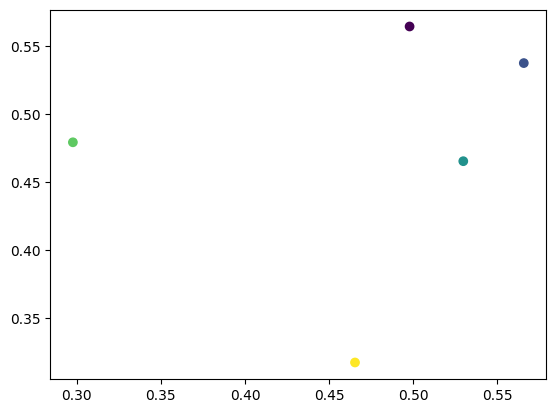

In [44]:
mean = [0.5, 0.5]
cov = [[0.01, 0], [0, 0.01]]
data_hd = np.random.multivariate_normal(mean, cov, 5)

plt.scatter(data_hd[:, 0], data_hd[:, 1], c=np.arange(len(data_hd)), cmap='viridis')

In [46]:
data_ld = np.random.normal(0.5, 0.2, (5, 1))
print(data_ld)

[[0.41844153]
 [0.58673297]
 [0.76049533]
 [0.59953988]
 [0.63068882]]


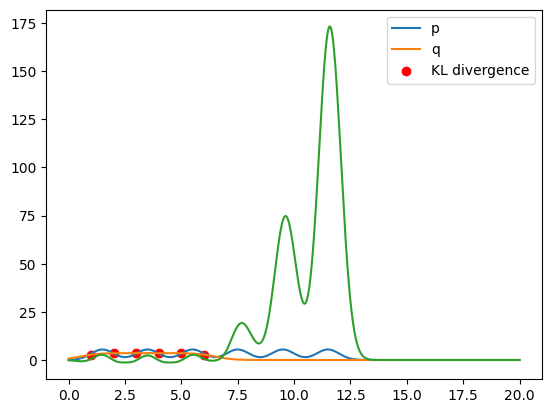

In [38]:
import numpy as np

# Define a set of 6 2D points
points_hd = np.array([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0],
    [7.0, 8.0],
    [9.0, 10.0],
    [11.0, 12.0]
])

points_ld = np.array([
    [1.0],
    [2.0],
    [3.0],
    [4.0],
    [5.0],
    [6.0]
])

# Compute the quantity q_ij for each point
def pij(points, x):
    norm = 0
    for i in range(len(points)):
        for j in range(len(points)):
            if i == j:
                continue
            norm =  1/ (1 + np.linalg.norm(points[i] - points[j]) ** 2)
    
    q = 0
    for j in range(len(points)):
        q += np.exp(-np.linalg.norm(x - points[j]) ** 2)
    
    q = q / norm
    
    return q


x = np.linspace(0, 20, 1000)
y_hd = np.array([pij(points_hd, xi) for xi in x])
y_ld = np.array([pij(points_ld, xi) for xi in x])

proj_hd = np.array([pij(points_hd, xi) for xi in points_hd])
proj_ld = np.array([pij(points_ld, xi) for xi in points_ld])

def kl_div(p, q):
    return p * np.log(p / q)

plt.plot(x, y_hd)
plt.plot(x, y_ld)
plt.scatter(points_ld, proj_ld, c='red')
plt.plot(x, kl_div(y_hd, y_ld))
plt.legend(['p', 'q', 'KL divergence'])
plt.show()

2024-07-29 09:48:31.445777: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-29 09:48:31.507108: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 09:48:32.028138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 09:48:32.030740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 09:48:33.152649: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

11490434/11490434 [==============================] - 1s 0us/step


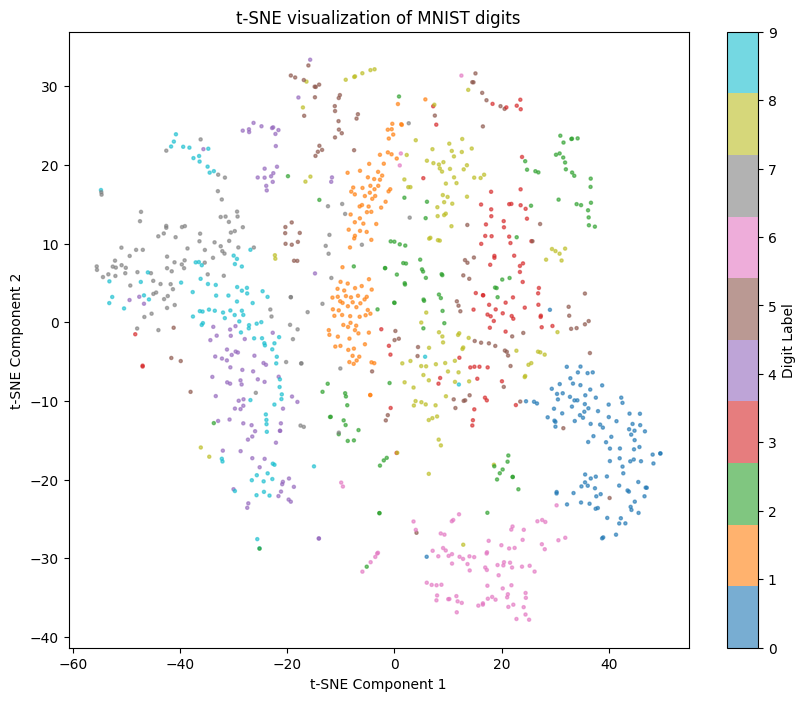

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0






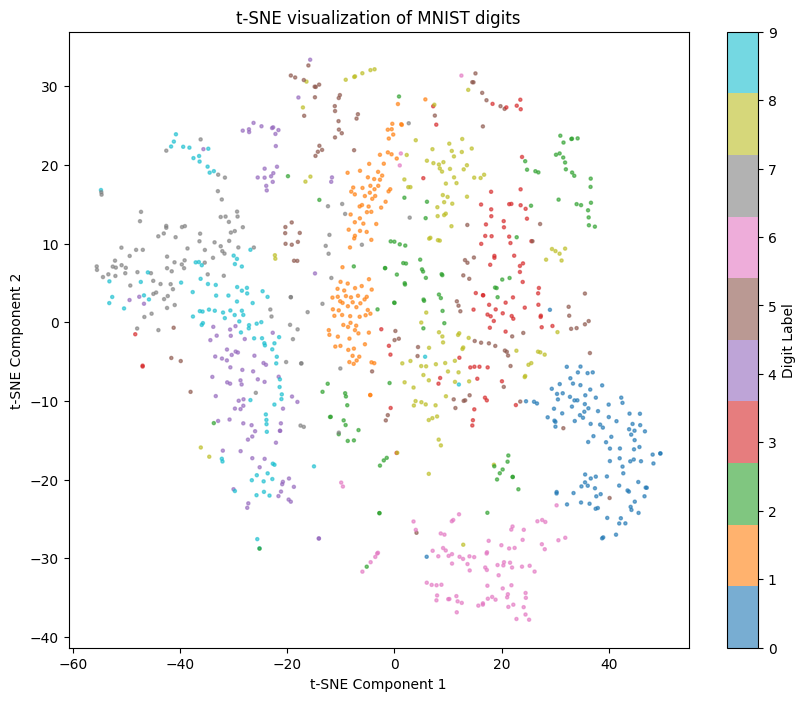

In [3]:
# Sample 1000 images
np.random.seed(42)  # For reproducibility
indices = np.random.choice(x_train.shape[0], 1000, replace=False)
x_sample = x_train[indices]
y_sample = y_train[indices]

# Optionally standardize the data (important for t-SNE)
scaler = StandardScaler()
x_sample = scaler.fit_transform(x_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_sample)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_sample, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE visualization of MNIST digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


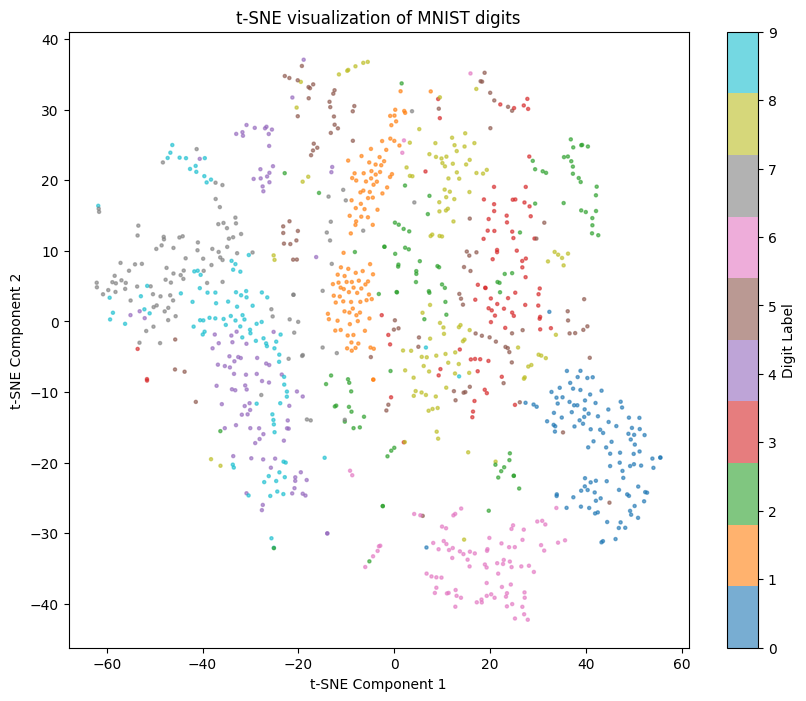

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


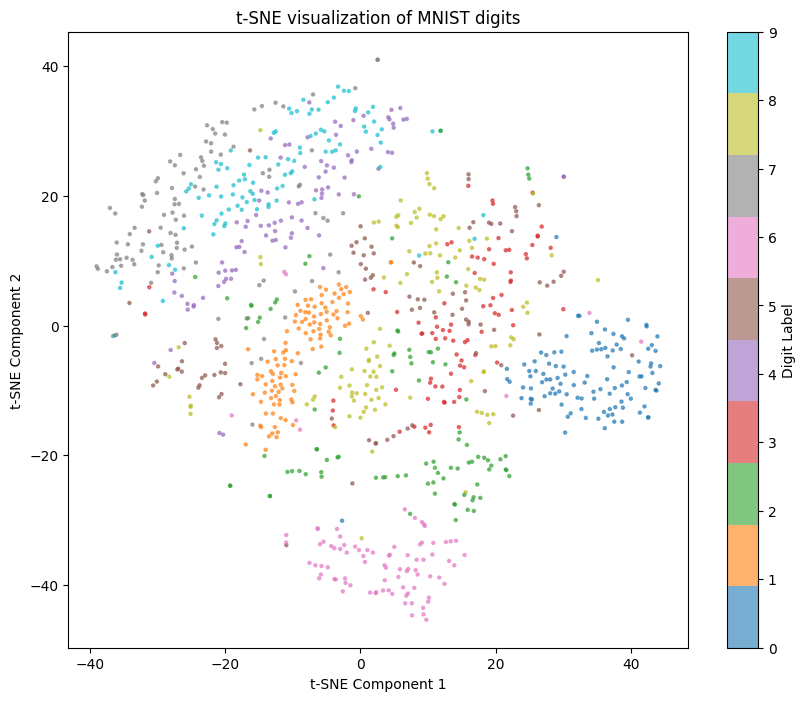

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


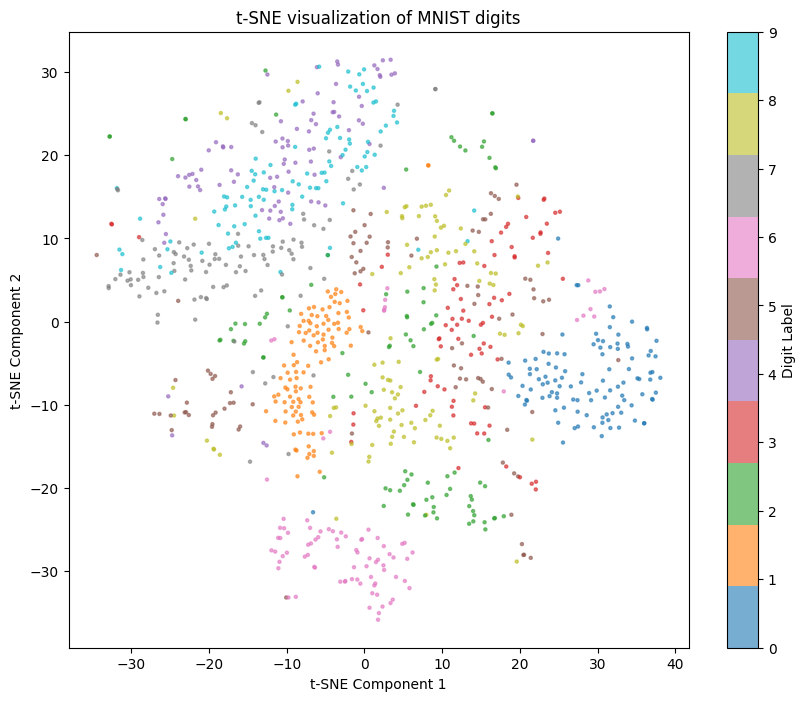

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


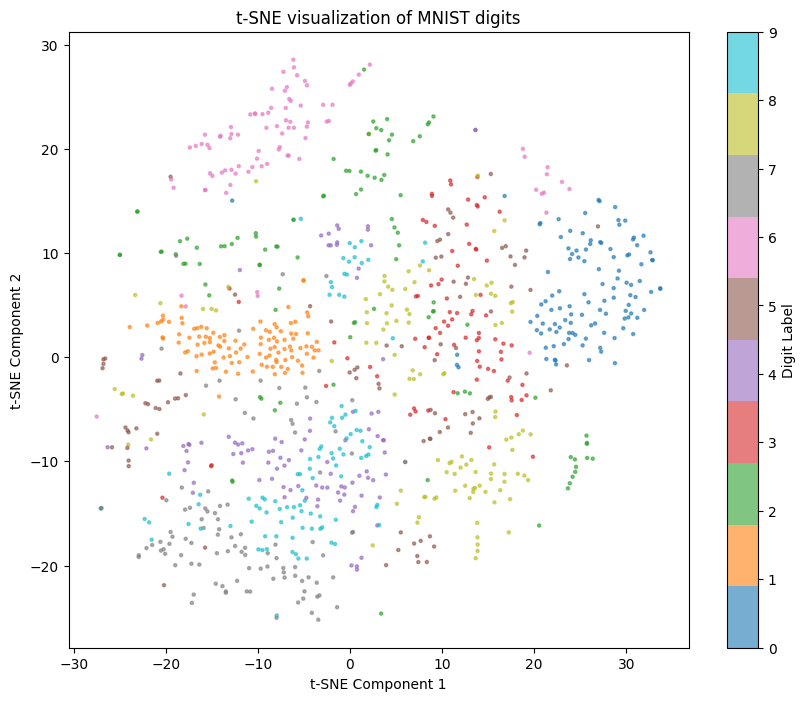

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


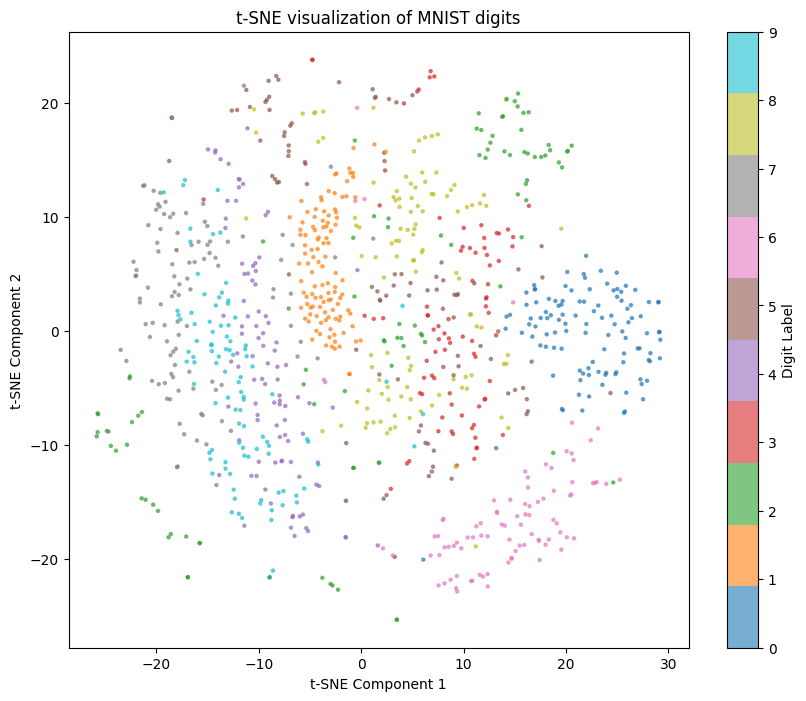

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


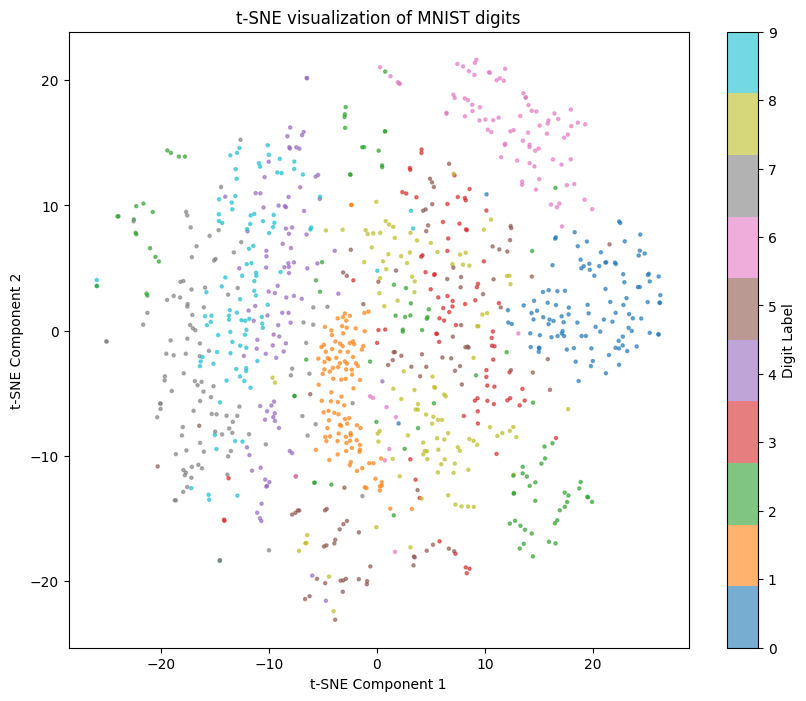

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


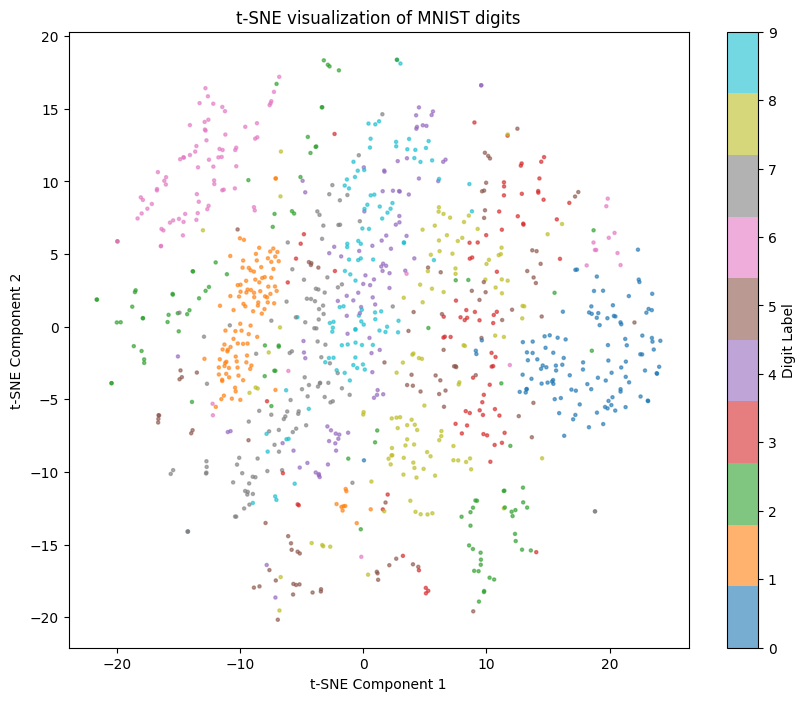

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


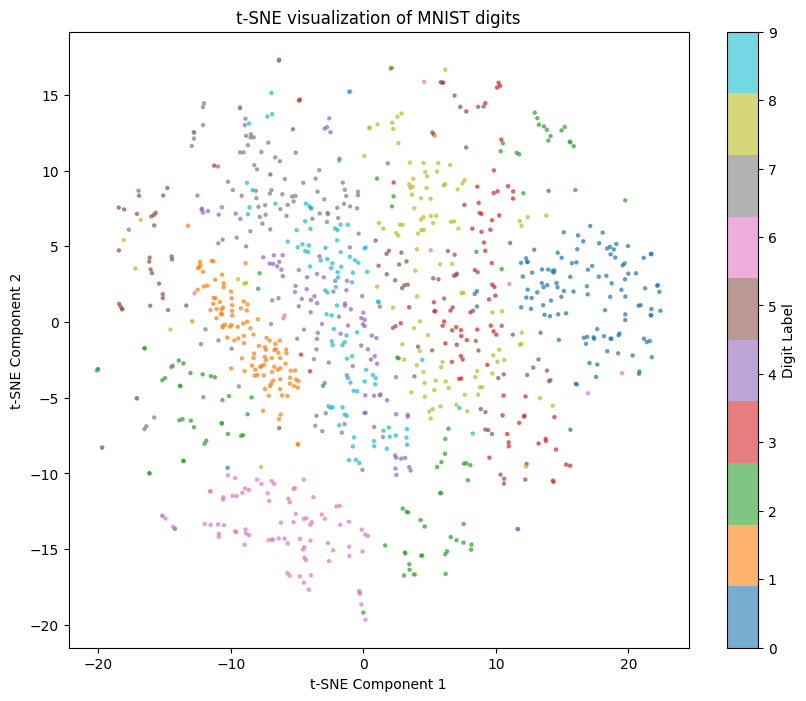

In [14]:
for perp in range(30, 101, 10):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp, n_iter=3000)
    x_tsne = tsne.fit_transform(x_sample)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_sample, cmap='tab10', s=5, alpha=0.6)
    plt.colorbar(scatter, label='Digit Label')
    plt.title('t-SNE visualization of MNIST digits')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

    # Prepare data for saving
    data_to_save = np.column_stack((x_tsne, y_sample))

    # Save to .npy file
    np.save(f'data/{perp}.npy', data_to_save)

In [10]:
data = np.load("data/30.npy")

coordinates = data[:, :2]
labels = data[:, 2]

# Normalize the coordinates
normalized_coordinates = (coordinates - coordinates.min(axis=0)) / (coordinates.max(axis=0) - coordinates.min(axis=0))



[[0.35303995 0.6684382 ]
 [0.68042064 0.532934  ]
 [0.5181195  0.37771192]
 ...
 [0.32405004 0.1088755 ]
 [0.5246262  0.33506215]
 [0.6916555  0.8668385 ]]


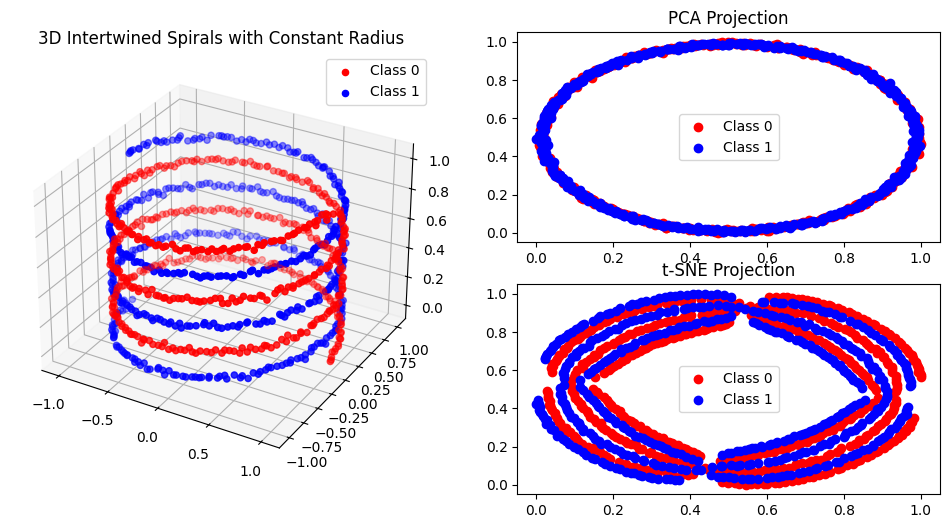

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate the data for two intertwined spirals with constant radius
def generate_spirals(n_points, radius=1, turns=3, noise=0.01):
    theta = np.linspace(0, turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    x1 = radius * np.cos(theta) + np.random.randn(n_points) * noise
    y1 = radius * np.sin(theta) + np.random.randn(n_points) * noise
    z1 = z + np.random.randn(n_points) * noise
    
    x2 = radius * np.cos(theta + np.pi) + np.random.randn(n_points) * noise
    y2 = radius * np.sin(theta + np.pi) + np.random.randn(n_points) * noise
    z2 = z + np.random.randn(n_points) * noise
    
    data = np.vstack((np.column_stack((x1, y1, z1)), np.column_stack((x2, y2, z2))))
    labels = np.hstack((np.zeros(n_points), np.ones(n_points)))
    
    return data, labels

# Create the dataset
n_points = 500
data, labels = generate_spirals(n_points)

# Plot the 3D spirals
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[labels == 0, 0], data[labels == 0, 1], data[labels == 0, 2], color='r', label='Class 0')
ax.scatter(data[labels == 1, 0], data[labels == 1, 1], data[labels == 1, 2], color='b', label='Class 1')
ax.set_title('3D Intertwined Spirals with Constant Radius')
ax.legend()

# Apply PCA
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Normalize the output of PCA
data_pca = (data_pca - data_pca.min(axis=0)) / (data_pca.max(axis=0) - data_pca.min(axis=0))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=100)
data_tsne = tsne.fit_transform(data)

# Normalize the output of t-SNE
data_tsne = (data_tsne - data_tsne.min(axis=0)) / (data_tsne.max(axis=0) - data_tsne.min(axis=0))

# Plot the 2D projections
ax2 = fig.add_subplot(222)
ax2.scatter(data_pca[labels == 0, 0], data_pca[labels == 0, 1], color='r', label='Class 0')
ax2.scatter(data_pca[labels == 1, 0], data_pca[labels == 1, 1], color='b', label='Class 1')
ax2.set_title('PCA Projection')
ax2.legend()

ax3 = fig.add_subplot(224)
ax3.scatter(data_tsne[labels == 0, 0], data_tsne[labels == 0, 1], color='r', label='Class 0')
ax3.scatter(data_tsne[labels == 1, 0], data_tsne[labels == 1, 1], color='b', label='Class 1')
ax3.set_title('t-SNE Projection')
ax3.legend()

plt.show()


/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


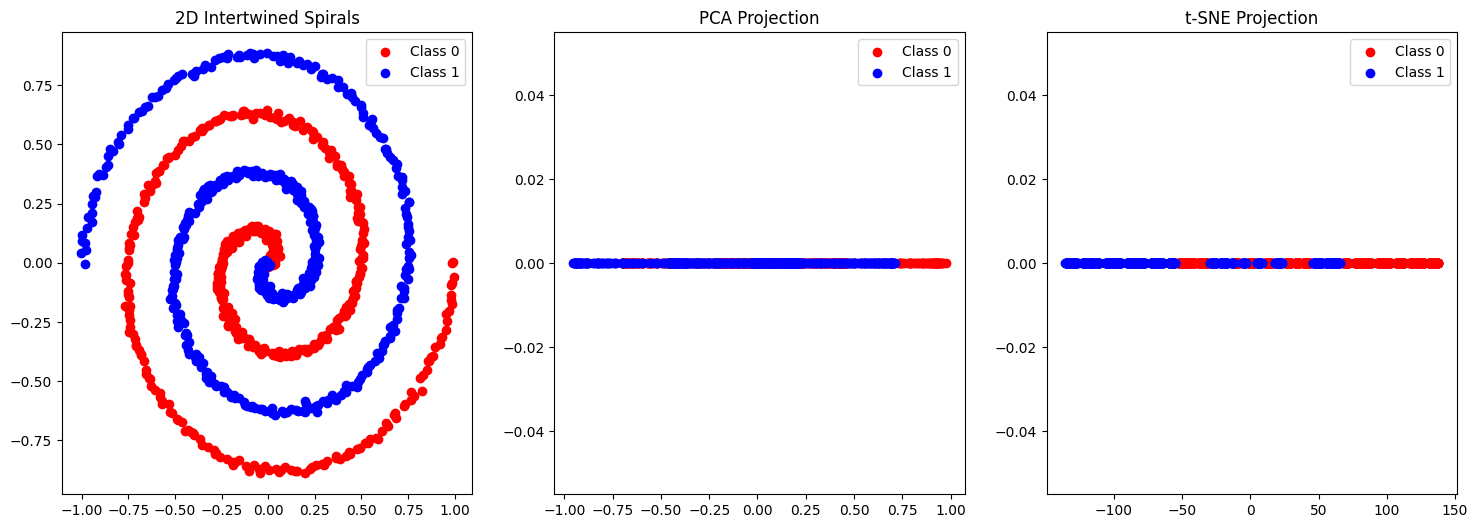

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate the data for two intertwined 2D spirals
def generate_spirals(n_points, noise=0.01):
    theta = np.linspace(0, 4 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x1 = r * np.cos(theta) + np.random.randn(n_points) * noise
    y1 = r * np.sin(theta) + np.random.randn(n_points) * noise
    
    x2 = r * np.cos(theta + np.pi) + np.random.randn(n_points) * noise
    y2 = r * np.sin(theta + np.pi) + np.random.randn(n_points) * noise
    
    data = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    labels = np.hstack((np.zeros(n_points), np.ones(n_points)))
    
    return data, labels

# Create the dataset
n_points = 500
data, labels = generate_spirals(n_points)

# Plot the 2D spirals
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color='r', label='Class 0')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='b', label='Class 1')
plt.title('2D Intertwined Spirals')
plt.legend()

# Apply PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)

# Apply t-SNE
tsne = TSNE(n_components=1, random_state=0, perplexity=20, n_iter=3000)
data_tsne = tsne.fit_transform(data)

# Plot the 1D projections
plt.subplot(132)
plt.scatter(data_pca[labels == 0], np.zeros(sum(labels == 0)), color='r', label='Class 0')
plt.scatter(data_pca[labels == 1], np.zeros(sum(labels == 1)), color='b', label='Class 1')
plt.title('PCA Projection')
plt.legend()

plt.subplot(133)
plt.scatter(data_tsne[labels == 0], np.zeros(sum(labels == 0)), color='r', label='Class 0')
plt.scatter(data_tsne[labels == 1], np.zeros(sum(labels == 1)), color='b', label='Class 1')
plt.title('t-SNE Projection')
plt.legend()

plt.show()


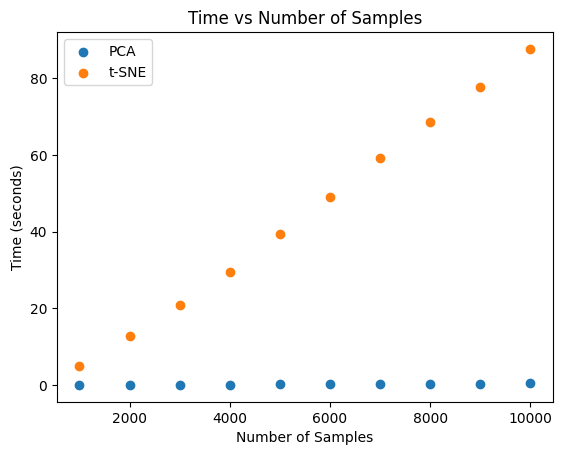

In [42]:
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import time

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

import matplotlib.pyplot as plt

# Initialize lists to store the results
n_samples_list = []
pca_time_list = []
tsne_time_list = []

# Loop over the number of samples
for n_samples in range(1000, 10001, 1000):
    # Limit the dataset to the specified number of samples
    X_sample = X[:n_samples]
    y_sample = y[:n_samples]

    # Timing PCA
    start_time = time.time()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_sample)
    pca_time = time.time() - start_time

    # Timing t-SNE
    start_time = time.time()
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_sample)
    tsne_time = time.time() - start_time

    # Append the results to the lists
    n_samples_list.append(n_samples)
    pca_time_list.append(pca_time)
    tsne_time_list.append(tsne_time)

# Plot the scatter plot of time versus number of samples
plt.scatter(n_samples_list, pca_time_list, label='PCA')
plt.scatter(n_samples_list, tsne_time_list, label='t-SNE')
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Samples')
plt.legend()
plt.show()


In [44]:
print(tsne_time_list)

[5.03499174118042, 12.883524656295776, 20.816063404083252, 29.46470046043396, 39.37271237373352, 48.95806956291199, 59.08102488517761, 68.41888761520386, 77.59302854537964, 87.58669137954712]


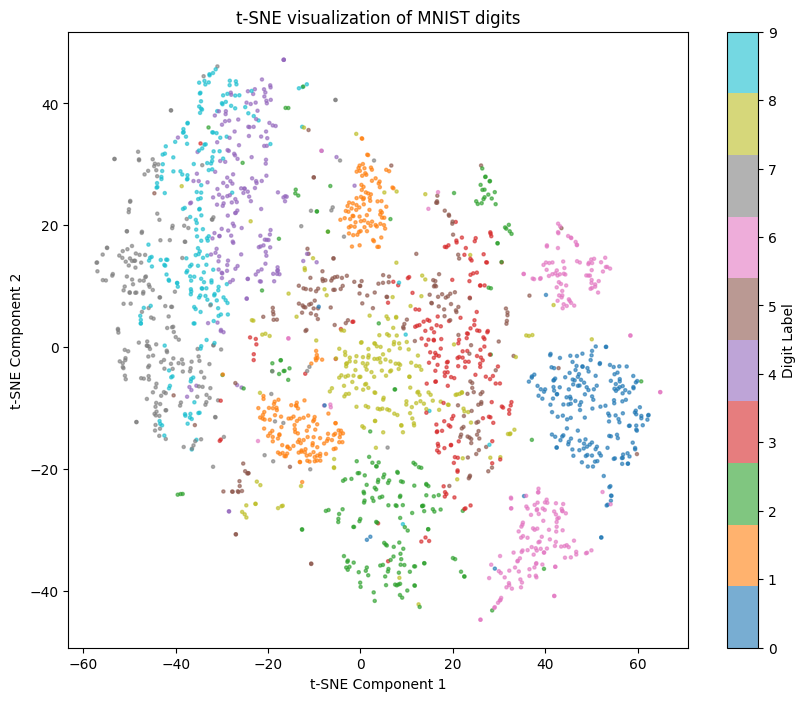

In [46]:
# Sample 1000 images
np.random.seed(42)  # For reproducibility
indices = np.random.choice(x_train.shape[0], 2000, replace=False)
x_sample = x_train[indices]
y_sample = y_train[indices]

# Optionally standardize the data (important for t-SNE)
scaler = StandardScaler()
x_sample = scaler.fit_transform(x_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
x_tsne = tsne.fit_transform(x_sample)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_sample, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE visualization of MNIST digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()



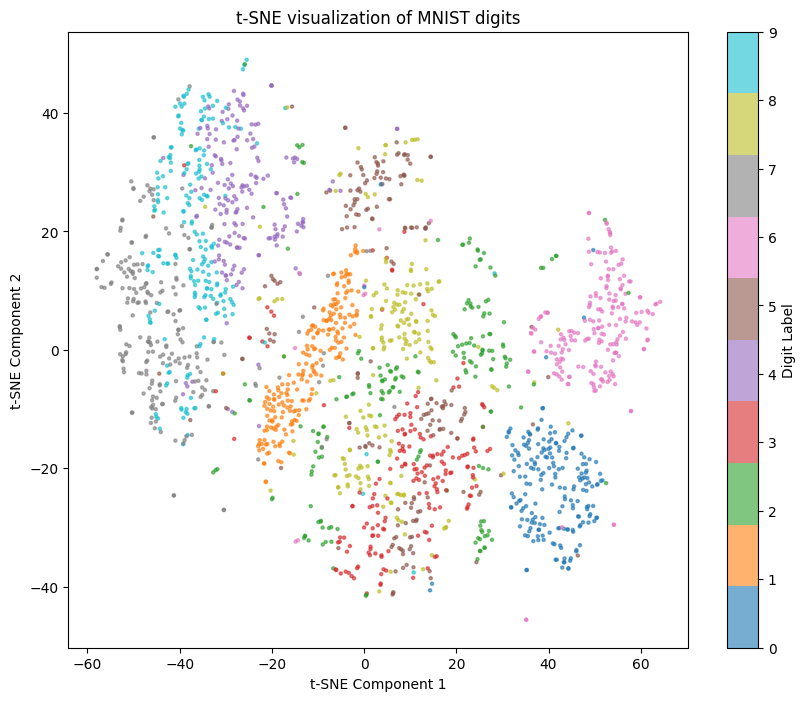

In [50]:
# Optionally standardize the data (important for t-SNE)
scaler = StandardScaler()
x_sample = scaler.fit_transform(x_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=31)
x_tsne = tsne.fit_transform(x_sample)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_sample, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE visualization of MNIST digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

data_to_save = np.column_stack((x_tsne, y_sample))

# Save to .npy file
np.save(f'data/31.npy', data_to_save)

In [51]:
from util import read_script, grayscale_to_hex
        
script = read_script("scripts/scene6.txt")
print(script)

['As you may have guessed the main advantage of SNE is that it can handle non-linear data, which is a big improvement over PCA.', 'For example, take this spring-like 3D dataset: on the right is the 2D representation of this dataset using PCA and SNE.', 'As you can see, PCA produces only one mixed-up cluster, whereas SNE successfully separates the two classes in the 2D representation.', 'Even if the visualisation is better, SNE has one major flaw, it runs terribly slowly.', 't-SNE introduces several changes to speed up and improve the visualisations of SNE, but it would take too long to go into the details of each of these improvements.', "The most important tweaks are in the probability distributions, like using symmetric distributions in the high-dimensional space and Student's t-distribution in the low-dimensional space.", 'Even with many modifications and hacks, t-SNE is still very slow compared to PCA: as you can see when running it on 10 thousands mnist samples, it takes almost 90